# Stock Prediction using Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import quandl
import datetime
import pandas as pd
start_date = datetime.date(2019, 3, 1)
end_date = datetime.date.today()

#Input API KEY
quandl.ApiConfig.api_key = 'token_number'

In [2]:
data=quandl.get('BITSTAMP/USD',start_date=start_date,end_date=end_date)
data=data.reset_index()
prices=data['Last'].tolist()
dates=data.index.tolist()
print(prices[:10],dates[:10])

[3791.36, 3807.05, 3810.46, 3789.52, 3698.65, 3844.07, 3851.26, 3856.64, 3844.64, 3916.42] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [3]:
#Convert to 1d Vector
dates = np.reshape(dates, (len(dates), 1))
prices = np.reshape(prices, (len(prices), 1))

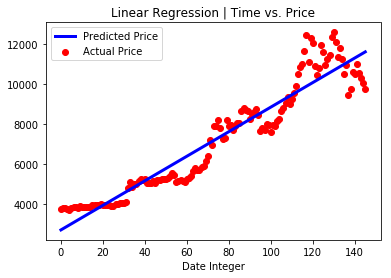

In [4]:
regressor = LinearRegression()
regressor.fit(dates, prices)
 
#Visualize Results
plt.scatter(dates, prices, color='red', label= 'Actual Price') #plotting the initial datapoints
plt.plot(dates, regressor.predict(dates), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression | Time vs. Price')
plt.legend()
plt.xlabel('Date Integer')
plt.show()

#  building model using train data and test data

In [5]:
xtrain,xtest,ytrain,ytest=train_test_split(dates,prices,test_size=0.33,random_state=86)
regression2=LinearRegression()
regression2.fit(xtrain,ytrain)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

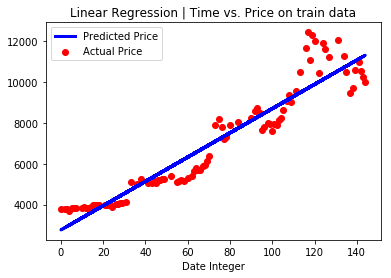

In [6]:
#Visualize Results train result
plt.scatter(xtrain, ytrain, color='red', label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtrain, regression2.predict(xtrain), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression | Time vs. Price on train data')
plt.legend()
plt.xlabel('Date Integer')
plt.show()

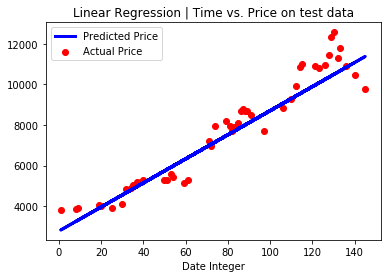

In [7]:
#Visualize Results test result 
plt.scatter(xtest, ytest, color='red', label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtest, regression2.predict(xtest), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression | Time vs. Price on test data')
plt.legend()
plt.xlabel('Date Integer')
plt.show()

In [8]:
print('for train data accuracy is',regression2.score(xtrain,ytrain))

for train data accuracy is 0.9019406010979806


In [9]:
print('for test data accuracy is',regression2.score(xtest,ytest))

for test data accuracy is 0.9149651297259347
